# The TLC trip record data

<img align="left" src="files/tlc.png">

Data source: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml  

This notebook heavily borrows from https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis/  

## Contents:

1. [Data Set - Overview](#1.-Data-Set-Overview)
2. [Missing Values](#2.-Missing-Values)
3. [Data Exploration](#3.-Data-Exploration)

# 1. The Data Set

Records of taxi trips in New York City including pickup time, geo-coordinates, the number of passengers, and various other variables.

### Data fields

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

### Task 1:

Brainstorm possible use cases for such a data set.

In [10]:
import datetime
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# read data from csv
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

### Dataset Overview

#### Training set

In [12]:
print("Total number of samples in train dataset: ", df_train.shape[0])
print("Number of columns in train dataset: ", df_train.shape[1])

Total number of samples in train dataset:  1458644
Number of columns in train dataset:  11


In [13]:
# peak
df_train.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429


In [14]:
# descriptive statistics (measures of central tendency and spread)
df_train.describe(percentiles=[])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Task 2

Compute mean, median, and mode of the column trip_duration.

mean :: the average value
median :: the value in the middle
mode :: the most frequent value

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Test set

In [17]:
print("Total number of samples in test dataset: ", df_test.shape[0])
print("Number of columns in test dataset: ", df_test.shape[1])

Total number of samples in test dataset:  625134
Number of columns in test dataset:  9


In [18]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# 2. Missing Values

Are there any missing values in the data set?

In [19]:
df_train.isnull().sum()  # isna()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [20]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

# 3. Data Exploration

### 3.1 Are the IDs in train and test sets unique? Is there overlap?

In [21]:
print("Number of ids in the training set: ", len(df_train["id"]))
print("Number of unique ids in the training set: ", len(pd.unique(df_train["id"])), "\n")

print("Number of ids in the test set: ", len(df_test["id"]))
print("Number of unique ids in the test set: ", len(pd.unique(df_test["id"])), "\n")

print("Number of common ids (if any) between the train and test sets: ", \
len(set(df_train["id"].values).intersection(set(df_test["id"].values))))

Number of ids in the training set:  1458644
Number of unique ids in the training set:  1458644 

Number of ids in the test set:  625134
Number of unique ids in the test set:  625134 

Number of common ids (if any) between the train and test sets:  0


### 3.2 Are vendor_ids unique in train and test sets? 

* vendor_id takes on only two values in both the train and test datasets, i.e. 1 and 2  
Hypothesis - This could represent data from two different taxi companies

#### This leads to a set of follow-up questions:

* If the hypothesis is right and the values in the vendor_id column actually represent the data from two different taxi companies; are the number of observations in the dataset from each of the companies comparable or is there any imbalance? (Both in the train and test datasets)

* Among the vendor_ids (1 and 2) - what is the distribution in the number of passengers (passenger_count) across the train and test datasets?

In [22]:
print("Number of vendor_ids in the train dataset: ", len(df_train["vendor_id"]))
print("Number of unique vendor_ids in the train dataset: ", len(pd.unique(df_train["vendor_id"])), "\n")

print("Number of vendor_ids in the test dataset: ", len(df_test["vendor_id"]))
print("Number of unique vendor_ids in the test dataset: ", len(pd.unique(df_test["vendor_id"])), "\n")

Number of vendor_ids in the train dataset:  1458644
Number of unique vendor_ids in the train dataset:  2 

Number of vendor_ids in the test dataset:  625134
Number of unique vendor_ids in the test dataset:  2 



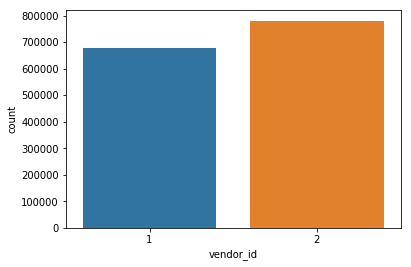

In [23]:
# The number of observations of each of the two companies seem comparable
sns.countplot(x="vendor_id", data=df_train)

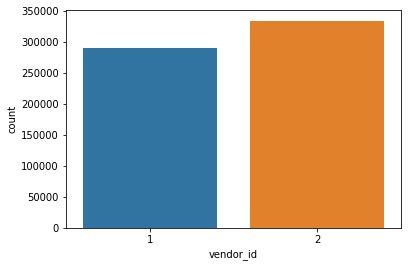

In [24]:
sns.countplot(x="vendor_id", data=df_test)

### 3.3 What's the distribution of the number of passengers across vendor_id variables

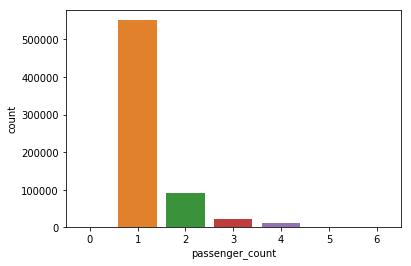

In [25]:
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 1])

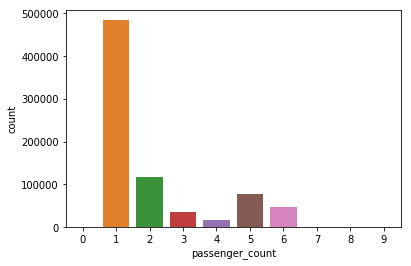

In [26]:
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 2])

In [ ]:
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 1])

In [ ]:
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 2])

### 3.4 What's the distribution of trip_duration across the training set

In [29]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])

df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])

In [32]:
# trip_duration represents the difference between dropoff_datetime and pickup_datetime
df_train["trip_duration"].describe(percentiles=[])

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
50%      6.620000e+02
max      3.526282e+06
Name: trip_duration, dtype: float64

In [33]:
# trip duration in datetime representation
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe(percentiles=[])

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
50%             0 days 00:11:02
max            40 days 19:31:22
dtype: object

_It is interesting to see that there happens to be a trip that lasted for over 40 days. Let us plot the trip duration in seconds to view any other possbile outliers._

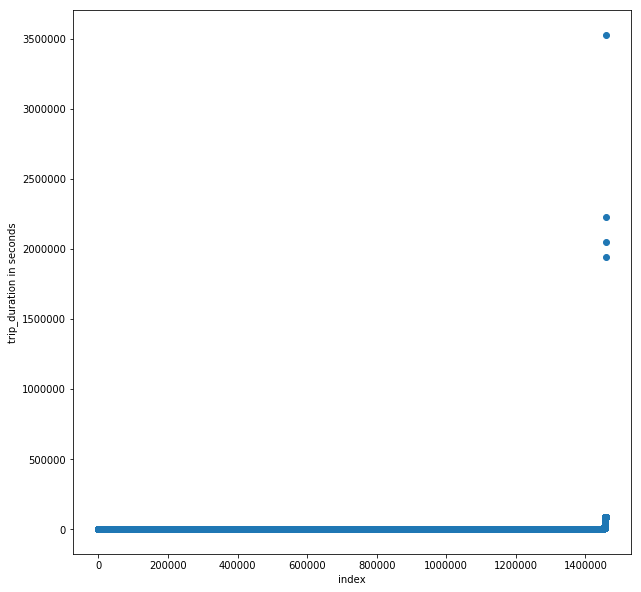

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

_We see that there are four outliers with trip durations of 20 days or more_

In [35]:
# Let's remove outliers
df_train = df_train[df_train["trip_duration"] < 500000]

In [36]:
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

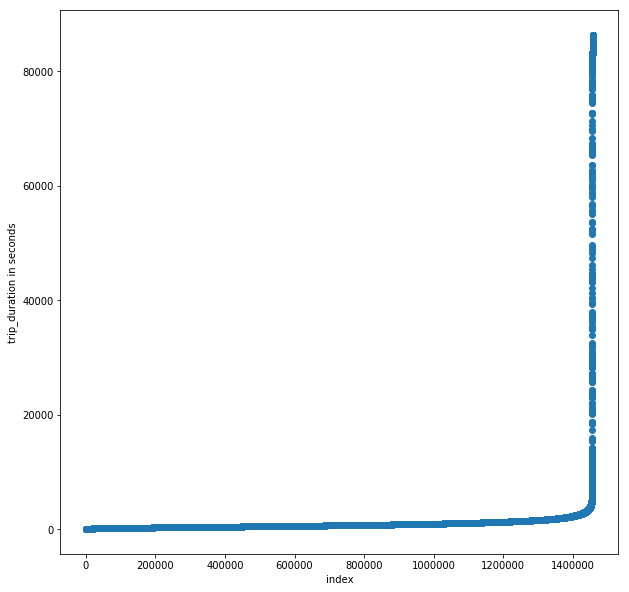

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

_It is interesting to see that a lot of trips, have a trip duration nearing 23 hours_

### 3.5 Distribution of the store_and_fwd_flag across the train dataset

In [ ]:
sns.countplot(x="store_and_fwd_flag", data=df_train)

_According to the Data Dictionary the store and fwd flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip. This must therefore indicate that most of the trips(99.448% to be precise) were not stored in the vehicle memory before forwarding._

_**Hypothesis** - In 99.448% of the trips, the vehicles might have been in an area of NYC, where the celluar reception was good; thereby having a connection to the server. In 0.551% of the trips, the celluar reception might have been poor; thereby having to store the trip record in the vehicle memory prior to sending it to the server. Could this affect the dropoff longitude and latitude? Would the dropoff coordinates not have been recorded until celluar reception was availbale again? If so, must we ignore such records while building the model?_

In [ ]:
len(df_train[df_train["store_and_fwd_flag"] == "N"])*100.0/(df_train.count()[0])

_Among the 0.551% of the trips in the train dataset, where the trip record was stored in the vehicle memory; we observe that all the 0.551% of the cases were only for vendor id = 1._

In [ ]:
set(df_train[df_train["store_and_fwd_flag"] == "Y"]["vendor_id"])

### 3.6 Exploring the distances between the pickup and dropoff lat/log coordinates

In [ ]:
from haversine import haversine

In [ ]:
def calculate_haversine_distance(var_row):
    return haversine((var_row["pickup_latitude"], var_row["pickup_longitude"]), 
                     (var_row["dropoff_latitude"], var_row["dropoff_longitude"]), miles = True)

In [ ]:
# #Calculating the Haversine Distance
# #The haversine formula determines the great-circle distance between two points on a sphere 
# #given their longitudes and latitudes.
df_train["haversine_distance"] = df_train.apply(lambda row: calculate_haversine_distance(row), axis=1)

In [ ]:
df_train.head()

In [ ]:
df_train["haversine_distance"].describe()

_Plot of the haversine distance vs. the trip duration._

In [ ]:
#plt.figure(figsize=(10,10))
#sns.regplot(x="haversine_distance", y="trip_duration", data=df_train)

![](http://kartikkannapur.github.io//images/haversine_distance_1.png)

_The presence of outliers in the train dataset(long tail in the haversine distance) might have caused the deviation in the regression line. It would be interesting to explore different methods for outlier detection._

In [ ]:
df_train[df_train["haversine_distance"] > 100]

In [ ]:
#plt.figure(figsize=(10,10))
#sns.regplot(x="haversine_distance", y="trip_duration", data=df_train[df_train["haversine_distance"] < 100])

![](http://kartikkannapur.github.io//images/haversine_distance_2.png)

### 3.7 Exploring the number of trips at each timestamp feature in the train dataset

_Once the train dataset has been cleaned, based on the outliers in column - trip duration(that consisted of a few trips lasting for 20 days or more), we can now explore the timestamps on a hourly-weekly basis for further exploratory analysis._

_The train dataset contains trips that range from 2016-01-01 to 2016-06-30, i.e. 6 months worth of data._

In [ ]:
print("Train dataset start date: ", min(df_train["pickup_datetime"]))
print("Train dataset end date: ", max(df_train["pickup_datetime"]))

In [ ]:
# #Conversion to pandas to_datetime has already been performed in section 5.5
# #df_train["pickup_datetime"] = pd.to_datetime(df_train['pickup_datetime'])


df_train["pickup_dayofweek"] = df_train.pickup_datetime.dt.dayofweek
df_train["pickup_weekday_name"] = df_train.pickup_datetime.dt.weekday_name
df_train["pickup_hour"] = df_train.pickup_datetime.dt.hour
df_train["pickup_month"] = df_train.pickup_datetime.dt.month

In [ ]:
df_train.head()

_Distribution of trips across - months in the six month rage, day of the week and hour in a day._

_We can observe that there are more trips on Friday's and Saturday's, than on any other weekday, and this make sense (TGIF :)); On a 24 hour clock, the number of trips is the highest between 17:00 hrs - 22:00 hrs and reduces post 01:00 hrs; On a six month time range, the number of trips are almost evenly distributed, with none of the months having a surprising spike in the dataset. _

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df_train)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_hour", data=df_train)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_month", data=df_train)
plt.show()

_It would now be interesting to visualize the behaviour of the trip duration variable, based on the timestamp features._

### 3.8 Exploring the behaviour of trip_duration based on the number of trips for each timestamp feature in the train dataset

_In order to visualize the trip duration behaviour, it would be important to aggregate the trip duration at each of the timnestamp feature levels. Since there could be outliers in the trip duration variable(and outlier detection has not yet been performed for this variable) median would be a more representative measure, rather than the mean._

In [ ]:
df_train.trip_duration.describe()

In [ ]:
df_train_agg = df_train.groupby('pickup_weekday_name')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_weekday_name.values, df_train_agg.trip_duration.values)
plt.show()

In [ ]:
df_train.groupby('pickup_weekday_name')['trip_duration'].describe()

In [ ]:
df_train_agg = df_train.groupby('pickup_hour')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_hour.values, df_train_agg.trip_duration.values)
plt.show()

In [ ]:
df_train.groupby('pickup_hour')['trip_duration'].describe()

In [ ]:
df_train_agg = df_train.groupby('pickup_month')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_month.values, df_train_agg.trip_duration.values)
plt.show()

In [ ]:
df_train.groupby('pickup_month')['trip_duration'].describe()

* Observation at a week-level:

_Trip durations are the most on Thursday's, Wednesday's and Friday's & the least on Sunday's._


* Observation at an hour-level:

_Trip durations are the most between 11:00 hrs and 16:00 hrs & the least between 04:00 hrs and 07:00 hrs._

* Observation at a month-level:

_There seems to be a linear increase in the median trip duration from the month of January to the month of June, although the increase is fairly minimal._